# Agency vs Communion - corellation analysis (English)

In [68]:
# general
import pandas as pd
import numpy as np
import scipy.stats
import codecs
from matplotlib import pyplot as plt
from numpy import linalg as LA

# bolukbasi's
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding

# mine
import db_functions as db

### Step 1: Load embeddings

We load all the emdeddings using the same methods and applying the same preprocessing in order to have a common start.

In [71]:
# load FastText's emdeddings (wikipedia only)
E_ft =  WordEmbedding('../embedding/fast-text/wiki.en.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/wiki.en.reduced.vec
(80, 300)
80 words of dimension 300 : he, his, her, she, ..., boastful, egoistic, broadminded, hardhearted
80 words of dimension 300 : he, his, her, she, ..., boastful, egoistic, broadminded, hardhearted


### Step 2: working whit FastText's embeddings

### Step 2.1: vector difference

In [72]:
# gender direction
g_diff = E_ft.diff('he', 'she')

#### Step 2.2: PCA

In [73]:
# list of pairs to define gender
gender_pairs = [['he','she'],
                ['his','her'],
                ['man','woman'],
                ['john','mary'],
                ['himself','herself'],
                ['son','daughter'],
                ['father','mother'],
                ['guy','gal'],
                ['boy','girl'],
                ['male','female']]

In [74]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [75]:
print("Singular values:")
print(sv)

Singular values:
[1.1442815  0.8523035  0.60972977 0.50737494 0.3993872  0.3585625
 0.33056718 0.24516939 0.19561277 0.15861395]


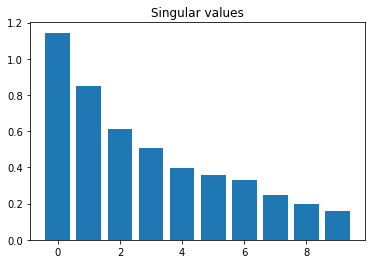

In [76]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [77]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])

#### Step 2.3: Compute projections

##### All words

In [78]:
import importlib
importlib.reload(db)

<module 'db_functions' from '/Users/davidebiasion/Documents/tesi/prova dati/agency-communion/db_functions.py'>

In [79]:
# words
ag_com = db.read('ag_com_en_usa_scores.txt', 'ag-com-en')

In [80]:
# compute projections
proj_ag_com_g_diff =  db.prof_proj(E_ft, ag_com, g_diff, 'ag-com-en')
proj_ag_com_g_pca_0 =  db.prof_proj(E_ft, ag_com, g_pca_0, 'ag-com-en')

In [81]:
# print ag_com results
ag_com_col0 = [] # pandas columns
ag_com_col1 = []
ag_com_col2 = []
ag_com_col3 = []
ag_com_col4 = []

for i in range(len(proj_ag_com_g_diff)):
    ag_com_col0.append(proj_ag_com_g_diff[i][0]) # word
    ag_com_col1.append(proj_ag_com_g_diff[i][1]) # projection on g_diff
    ag_com_col2.append(proj_ag_com_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_col3.append(proj_ag_com_g_diff[i][2])
    ag_com_col4.append(proj_ag_com_g_diff[i][3])

ag_com_data = {'Word':ag_com_col0, 
               'Proj g_diff':ag_com_col1,
               'Proj g_pca_0':ag_com_col2, 
               'Agency':ag_com_col3,
               'Communion':ag_com_col4}

ag_com_table = pd.DataFrame(ag_com_data)
ag_com_table

,Word,Proj g_diff,Proj g_pca_0,Agency,Communion
0,able,0.039315,0.008979,2.10,1.17
1,active,0.082567,0.017624,2.29,1.41
2,affectionate,-0.092945,-0.073934,-0.34,2.32
3,altruistic,0.034883,0.019120,-0.29,1.27
4,ambitious,0.034659,0.037015,2.76,0.48
5,assertive,-0.112869,-0.138409,2.73,0.32
6,boastful,0.108322,0.100745,1.31,-1.21
7,broadminded,0.002355,0.003481,0.95,1.98
8,capable,-0.009562,-0.018644,2.26,1.24
9,caring,-0.135241,-0.125400,-0.27,2.59


In [82]:
# ag_com correlation
# agency correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col3, ag_com_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col3, ag_com_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col3, ag_com_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col3, ag_com_col2)[1]

In [83]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency correlation")
pearson_table

Agency correlation


,g_diff,g_pca_0
r,0.331563,0.273654
p,0.009656,0.034371


In [84]:
# communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col4, ag_com_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col4, ag_com_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col4, ag_com_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col4, ag_com_col2)[1]

In [85]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion correlation")
pearson_table

Communion correlation


,g_diff,g_pca_0
r,-0.065838,-0.176985
p,0.617222,0.176122


In [86]:
# agency-communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col2)[1]

In [87]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency-Communion correlation")
pearson_table

Agency-Communion correlation


,g_diff,g_pca_0
r,0.256510,0.294391
p,0.047888,0.022417


##### Ungendered words

In [88]:
# words
ag_com_ung = db.read('ag_com_ung_en_usa_scores.txt', 'ag-com-en')

In [89]:
# compute projections
proj_ag_com_ung_g_diff =  db.prof_proj(E_ft, ag_com_ung, g_diff, 'ag-com-en')
proj_ag_com_ung_g_pca_0 =  db.prof_proj(E_ft, ag_com_ung, g_pca_0, 'ag-com-en')

In [90]:
# print ag_com_ung results
ag_com_ung_col0 = [] # pandas columns
ag_com_ung_col1 = []
ag_com_ung_col2 = []
ag_com_ung_col3 = []
ag_com_ung_col4 = []

for i in range(len(proj_ag_com_ung_g_diff)):
    ag_com_ung_col0.append(proj_ag_com_ung_g_diff[i][0]) # word
    ag_com_ung_col1.append(proj_ag_com_ung_g_diff[i][1]) # projection on g_diff
    ag_com_ung_col2.append(proj_ag_com_ung_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_ung_col3.append(proj_ag_com_ung_g_diff[i][2])
    ag_com_ung_col4.append(proj_ag_com_ung_g_diff[i][3])

ag_com_ung_data = {'Word':ag_com_ung_col0, 
               'Proj g_diff':ag_com_ung_col1,
               'Proj g_pca_0':ag_com_ung_col2,
               'Agency':ag_com_ung_col3,
               'Communion':ag_com_ung_col4}

ag_com_ung_table = pd.DataFrame(ag_com_ung_data)
ag_com_ung_table

,Word,Proj g_diff,Proj g_pca_0,Agency,Communion
0,able,0.039315,0.008979,2.10,1.17
1,altruistic,0.034883,0.019120,-0.29,1.27
2,capable,-0.009562,-0.018644,2.26,1.24
3,competent,0.106703,0.063722,1.98,1.12
4,consistent,0.101965,0.078419,1.55,1.21
5,dominant,0.060557,0.008881,2.64,-1.31
6,friendly,0.092549,0.063497,0.05,2.59
7,helpful,-0.008199,-0.034058,-0.10,2.69
8,egoistic,0.039951,0.052580,1.56,-1.83
9,independent,0.027926,0.008640,2.90,-1.07


In [91]:
# ag_com_ung correlation
# agency correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col2)[1]

In [92]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency ungendered correlation")
pearson_table

Agency ungendered correlation


,g_diff,g_pca_0
r,0.379706,0.356022
p,0.089555,0.113191


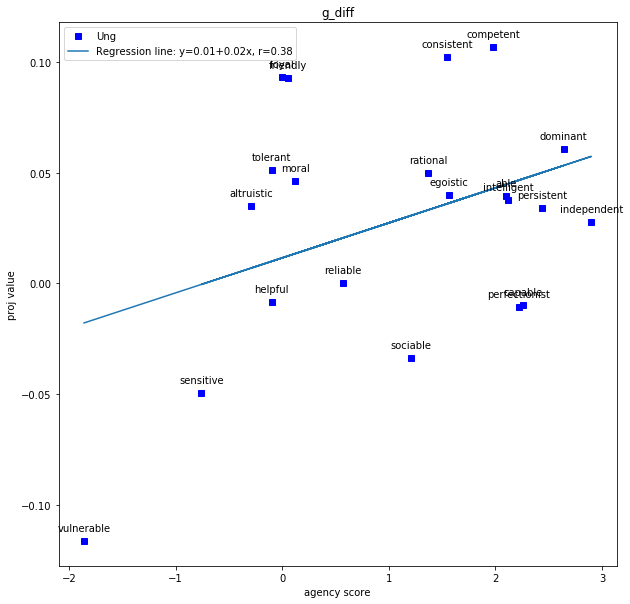

In [93]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col3, ag_com_ung_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col3, ag_com_ung_col1, linewidth=0, marker='s', color='blue', label='Ung')
ax.plot(np.array(ag_com_ung_col3), intercept + slope * np.array(ag_com_ung_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col3[i], ag_com_ung_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/ag/ft_g_diff')

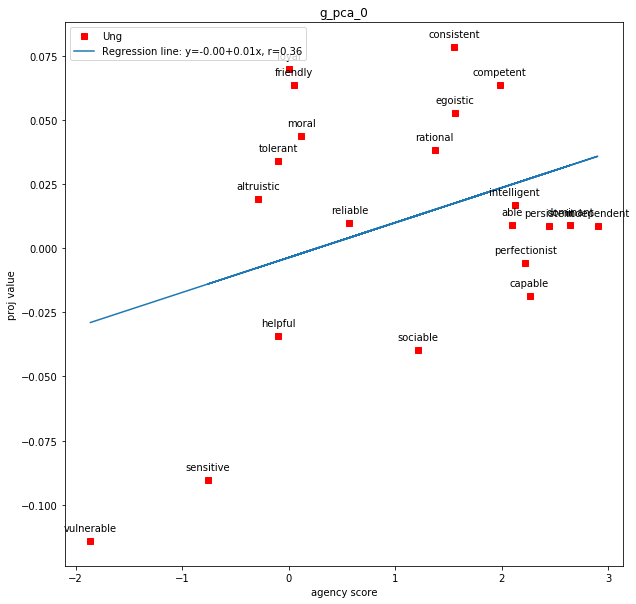

In [94]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col3, ag_com_ung_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col3, ag_com_ung_col2, linewidth=0, marker='s', color='red', label='Ung')
ax.plot(np.array(ag_com_ung_col3), intercept + slope * np.array(ag_com_ung_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col3[i], ag_com_ung_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/ag/ft_g_pca_0')

In [95]:
# communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col2)[1]

In [96]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion ungendered correlation")
pearson_table

Communion ungendered correlation


,g_diff,g_pca_0
r,0.106083,0.102527
p,0.647197,0.658317


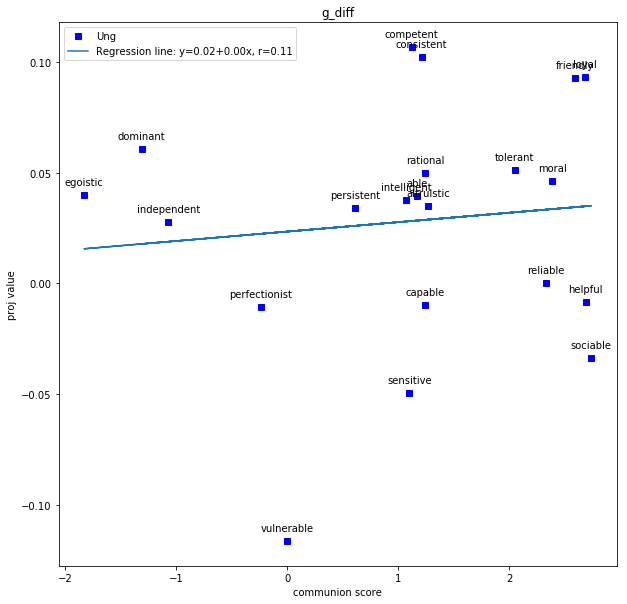

In [97]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col4, ag_com_ung_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col4, ag_com_ung_col1, linewidth=0, marker='s', color='blue', label='Ung')
ax.plot(np.array(ag_com_ung_col4), intercept + slope * np.array(ag_com_ung_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col4[i], ag_com_ung_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/com/ft_g_diff')

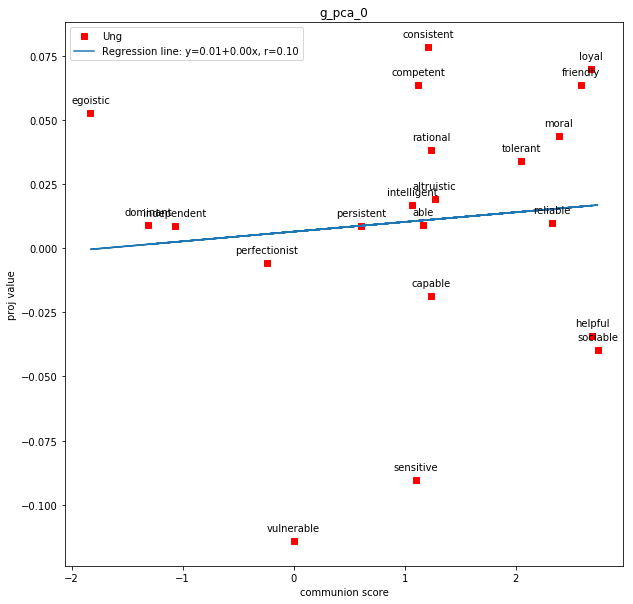

In [98]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col4, ag_com_ung_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col4, ag_com_ung_col2, linewidth=0, marker='s', color='red', label='Ung')
ax.plot(np.array(ag_com_ung_col4), intercept + slope * np.array(ag_com_ung_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col4[i], ag_com_ung_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/com/ft_g_pca_0')

In [99]:
# agency-communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[0]
r_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[1]
p_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[1]

In [100]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency-Communion ungendered correlation")
pearson_table

Agency-Communion ungendered correlation


,g_diff,g_pca_0
r,0.155271,0.102527
p,0.501542,0.658317


##### Gendered words

In [101]:
# words
ag_com_gen = db.read('ag_com_gen_en_usa_scores.txt', 'ag-com-en')

In [102]:
# compute projections
proj_ag_com_gen_g_diff =  db.prof_proj(E_ft, ag_com_gen, g_diff, 'ag-com-en')
proj_ag_com_gen_g_pca_0 =  db.prof_proj(E_ft, ag_com_gen, g_pca_0, 'ag-com-en')

In [103]:
# print ag_com_gen results
ag_com_gen_col0 = [] # pandas columns
ag_com_gen_col1 = []
ag_com_gen_col2 = []
ag_com_gen_col3 = []
ag_com_gen_col4 = []

for i in range(len(proj_ag_com_gen_g_diff)):
    ag_com_gen_col0.append(proj_ag_com_gen_g_diff[i][0]) # word
    ag_com_gen_col1.append(proj_ag_com_gen_g_diff[i][1]) # projection on g_diff
    ag_com_gen_col2.append(proj_ag_com_gen_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_gen_col3.append(proj_ag_com_gen_g_diff[i][2])
    ag_com_gen_col4.append(proj_ag_com_gen_g_diff[i][3])

ag_com_gen_data = {'Word':ag_com_gen_col0, 
               'Proj g_diff':ag_com_gen_col1,
               'Proj g_pca_0':ag_com_gen_col2,
               'Agency':ag_com_gen_col3,
               'Communion':ag_com_gen_col4}

ag_com_gen_table = pd.DataFrame(ag_com_gen_data)
ag_com_gen_table

,Word,Proj g_diff,Proj g_pca_0,Agency,Communion
0,active,0.082567,0.017624,2.29,1.41
1,affectionate,-0.092945,-0.073934,-0.34,2.32
2,ambitious,0.034659,0.037015,2.76,0.48
3,assertive,-0.112869,-0.138409,2.73,0.32
4,boastful,0.108322,0.100745,1.31,-1.21
5,broadminded,0.002355,0.003481,0.95,1.98
6,caring,-0.135241,-0.125400,-0.27,2.59
7,chaotic,0.075204,0.049170,-0.12,-1.00
8,competitive,0.022335,0.025508,2.73,-1.21
9,conceited,0.022807,0.041938,1.02,-2.24


In [104]:
# ag_com_gen correlation
# agency correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col2)[1]

In [105]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency gendered correlation")
pearson_table

Agency gendered correlation


,g_diff,g_pca_0
r,0.305321,0.245457
p,0.058744,0.132028


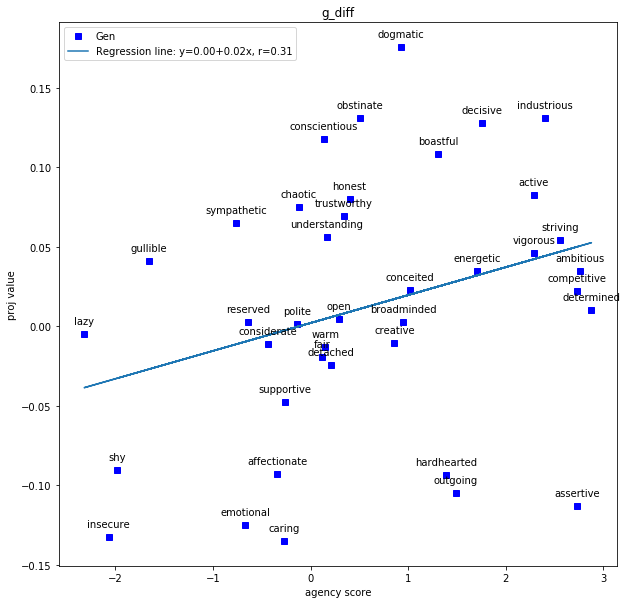

In [106]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col3, ag_com_gen_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col3, ag_com_gen_col1, linewidth=0, marker='s', color='blue', label='Gen')
ax.plot(np.array(ag_com_gen_col3), intercept + slope * np.array(ag_com_gen_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col3[i], ag_com_gen_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/ag/ft_g_diff')

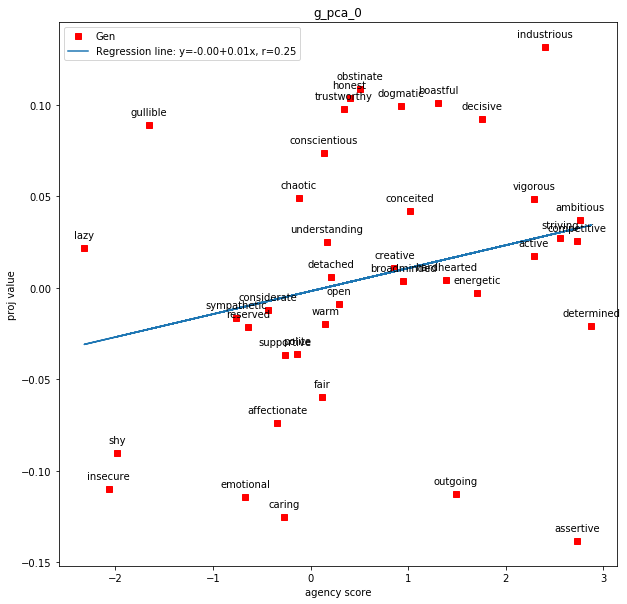

In [107]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col3, ag_com_gen_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col3, ag_com_gen_col2, linewidth=0, marker='s', color='red', label='Gen')
ax.plot(np.array(ag_com_gen_col3), intercept + slope * np.array(ag_com_gen_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col3[i], ag_com_gen_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/ag/ft_g_pca_0')

In [108]:
# communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col2)[1]

In [109]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion gendered correlation")
pearson_table

Communion gendered correlation


,g_diff,g_pca_0
r,-0.142286,-0.280198
p,0.387547,0.084041


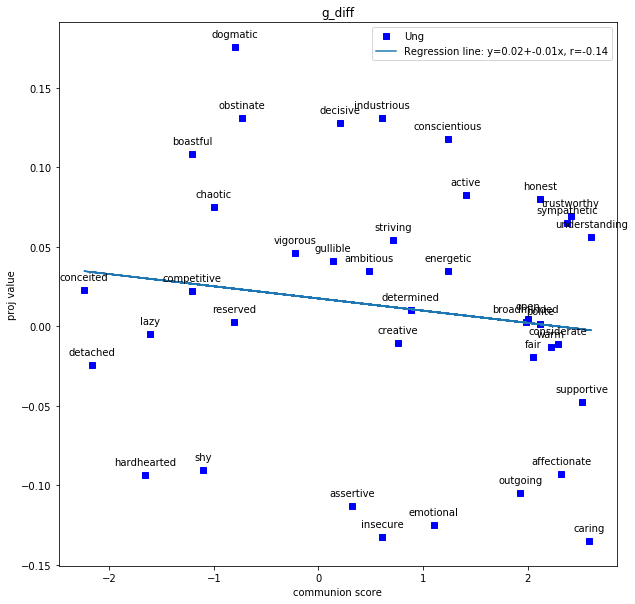

In [110]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col4, ag_com_gen_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col4, ag_com_gen_col1, linewidth=0, marker='s', color='blue', label='Ung')
ax.plot(np.array(ag_com_gen_col4), intercept + slope * np.array(ag_com_gen_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col4[i], ag_com_gen_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/com/ft_g_diff')

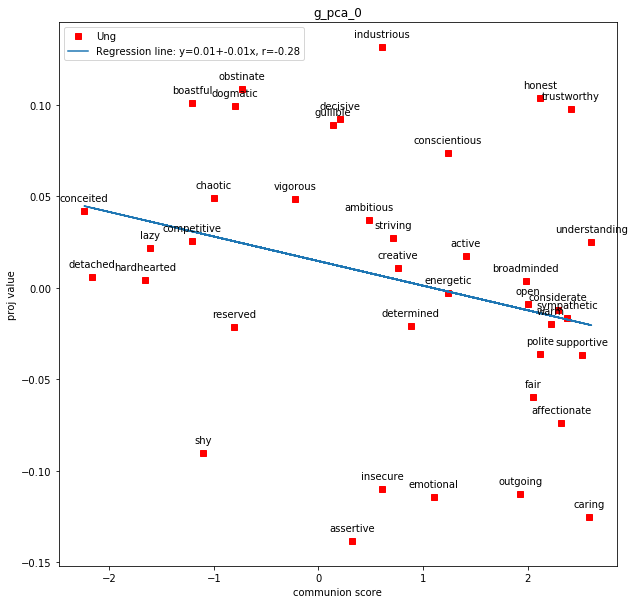

In [111]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col4, ag_com_gen_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col4, ag_com_gen_col2, linewidth=0, marker='s', color='red', label='Ung')
ax.plot(np.array(ag_com_gen_col4), intercept + slope * np.array(ag_com_gen_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col4[i], ag_com_gen_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/com/ft_g_pca_0'